Keras is a powerful and easy-to-use Python library for developing and evaluating deep learning models. It wraps the efficient numerical computation libraries Theano, CNTK and TensorFlow and allows you to define and train neural network models in a few short lines of code. In this tutorial you will discover how to create your first neural network model in Python using Keras. After completing this lesson you will know:


*   How to load a dataset for use with Keras.
*   How to define and compile a Multilayer Perceptron model in Keras.
*   How to evaluate a Keras model on a validation dataset.



# Load Libraries

First step is to load the required libraries.

In [2]:
import numpy 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.datasets import mnist

# Load Dataset in Numpy Format

MNIST is a simple computer vision dataset. It consists of images of handwritten digits. It also includes labels for each image, telling us which digit it is.

The MNIST data is split into three parts: $60,000$ data points of training data, and $10,000$ points of test data. Each image is 28 pixels by 28 pixels.

In [3]:
(X_train1, y_train1), (X_test1, y_test1) = mnist.load_data()

In [49]:
numpy.unique(y_train1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
X_train1.shape

(60000, 28, 28)

In [7]:
y_train1.shape

(60000,)

In [8]:
X_test1.shape

(10000, 28, 28)

In [9]:
y_test1.shape

(10000,)

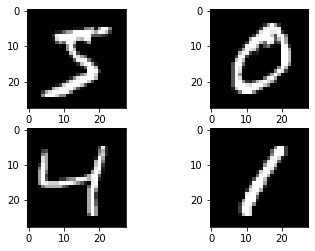

In [45]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train1[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train1[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train1[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train1[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# Formatting Data and Labels for Keras

We can flatten this array into a vector of $28\times28 = 784$ numbers. It doesn't matter how we flatten the array, as long as we're consistent between images. From this perspective, the MNIST images are just a bunch of points in a 784-dimensional vector space. The data should always be of the format (Number of data points, data point dimension). In this case the training data will be of format $60,000\times784$.

In [11]:
num_pixels = X_train1.shape[1] * X_train1.shape[2]

X_train = X_train1.reshape(X_train1.shape[0], num_pixels).astype('float32')

X_test = X_test1.reshape(X_test1.shape[0], num_pixels).astype('float32')

#X_train = X_train1 / 255

#X_test = X_test1 / 255

y_train = np_utils.to_categorical(y_train1)

y_test = np_utils.to_categorical(y_test1)

num_classes = y_test.shape[1]

In [12]:
X_train.shape

(60000, 784)

In [13]:
X_test.shape

(10000, 784)

In [14]:
y_train.shape

(60000, 10)

In [15]:
y_test.shape

(10000, 10)

Here we will define a single layer neural network. It will have a input layer of $784$ neurons, i.e. the input dimension and output layer of $10$ neurons, i.e. number of classes. The activation function used will be softmax activation.

# Defining a single layer neural network model

In [16]:
# create model

model = Sequential()

model.add(Dense(num_classes, input_dim=num_pixels, activation='softmax'))


# Compiling the model

Once the model is defined, we have to compile it. While compiling we provide the loss function to be used, the optimizer and any metric. Here we will use crossentropy loss with Adam optimizer and accuracy as a metric.

In [17]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training/Fitting the model

Now the model is ready to be trained. We will provide training data to the network. Also we will specify the validation data, over which the model will only be validated.

In [25]:
# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=50)

Epoch 1/20
1200/1200 [==============================] - 3s 2ms/step - loss: 4.9730 - accuracy: 0.8769 - val_loss: 4.5782 - val_accuracy: 0.8980
Epoch 2/20
1200/1200 [==============================] - 3s 2ms/step - loss: 4.1361 - accuracy: 0.8883 - val_loss: 5.4679 - val_accuracy: 0.8746
Epoch 3/20
1200/1200 [==============================] - 2s 2ms/step - loss: 4.0787 - accuracy: 0.8890 - val_loss: 5.0019 - val_accuracy: 0.8847
Epoch 4/20
1200/1200 [==============================] - 2s 2ms/step - loss: 3.8950 - accuracy: 0.8928 - val_loss: 4.7489 - val_accuracy: 0.8881
Epoch 5/20
1200/1200 [==============================] - 2s 2ms/step - loss: 3.9238 - accuracy: 0.8931 - val_loss: 4.6284 - val_accuracy: 0.8992
Epoch 6/20
1200/1200 [==============================] - 2s 2ms/step - loss: 4.0357 - accuracy: 0.8919 - val_loss: 4.6077 - val_accuracy: 0.8987
Epoch 7/20
1200/1200 [==============================] - 2s 2ms/step - loss: 4.0081 - accuracy: 0.8917 - val_loss: 4.7472 - val_accuracy:

# Evaluating the model

Finally we will evaluate the model on the testing dataset.

In [30]:
# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 0s 993us/step - loss: 4.9936 - accuracy: 0.9031
Baseline Error: 9.69%


# Defining a multi-layer model

Now we will define a multi layer neural network in which we will add $2$ hidden layers having $500$ and $100$ neurons.

In [35]:
model = Sequential()

model.add(Dense(500, input_dim=num_pixels, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))


In [36]:
# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 3s 11ms/step - loss: 3.0618 - accuracy: 0.8526 - val_loss: 0.5649 - val_accuracy: 0.8878
Epoch 2/10
300/300 [==============================] - 3s 10ms/step - loss: 0.3594 - accuracy: 0.9182 - val_loss: 0.3499 - val_accuracy: 0.9281
Epoch 3/10
300/300 [==============================] - 3s 10ms/step - loss: 0.2223 - accuracy: 0.9437 - val_loss: 0.2826 - val_accuracy: 0.9412
Epoch 4/10
300/300 [==============================] - 3s 10ms/step - loss: 0.1602 - accuracy: 0.9576 - val_loss: 0.2516 - val_accuracy: 0.9509
Epoch 5/10
300/300 [==============================] - 3s 10ms/step - loss: 0.1365 - accuracy: 0.9639 - val_loss: 0.2532 - val_accuracy: 0.9469
Epoch 6/10
300/300 [==============================] - 3s 10ms/step - loss: 0.1110 - accuracy: 0.9692 - val_loss: 0.2129 - val_accuracy: 0.9590
Epoch 7/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0995 - accuracy: 0.9729 - val_loss: 0.2577 - val_accuracy: 0.9598